Name(s): Michael Jung\
Assignment: Project 1\
Due Date: 9/27/24\
Description: Applied the concepts of table manipulations and functions to real world data for analysis\
Academic Honesty Pledge:  I, Michael Jung do hereby certify that I have derived no assistance for this project from any sources\ 
other than those listed as references\ 
References: none\
Replit (for projects): none

In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("project1.ipynb")

# Project 1: World Progress

In this project, you'll explore data from [Gapminder.org](http://gapminder.org), a website dedicated to providing a fact-based view of the world and how it has changed. That site includes several data visualizations and presentations, but also publishes the raw data that we will use in this project to recreate and extend some of their most famous visualizations.

The Gapminder website collects data from many sources and compiles them into tables that describe many countries around the world. All of the data they aggregate are published in the [Systema Globalis](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/README.md). Their goal is "to compile all public statistics; Social, Economic and Environmental; into a comparable total dataset." All data sets in this project are copied directly from the Systema Globalis without any changes.

This project is dedicated to [Hans Rosling](https://en.wikipedia.org/wiki/Hans_Rosling) (1948-2017), who championed the use of data to understand and prioritize global development challenges.

### Logistics

**Rules.** Don't share your code with anybody but your partner. You are welcome to discuss questions with other students, but don't share the answers. The experience of solving the problems in this project will prepare you for exams (and life). If someone asks you for the answer, resist! Instead, you can demonstrate how you would solve a similar problem.

**Support.** You are not alone! Come to office hours and talk to your classmates. If you want to ask about the details of your solution to a problem, come see me. If you're ever feeling overwhelmed or don't know how to make progress, email for help.

**Tests.** The tests that are given are **not comprehensive** and passing the tests for a question **does not** mean that you answered the question correctly. Tests usually only check that your table has the correct column labels. However, more tests will be applied to verify the correctness of your submission in order to assign your final score, so be careful and check your work! You might want to create your own checks along the way to see if your answers make sense. Additionally, before you submit, make sure that none of your cells take a very long time to run (several minutes).

**Free Response Questions:** Make sure that you put the answers to the written questions in the indicated cell we provide. **Every free response question should include an explanation** that adequately answers the question.

**Tabular Thinking Guide:** Feel free to reference [Tabular Thinking Guide](https://drive.google.com/file/d/1NvbBECCBdI0Ku380oPcTUOcpjH3RI230/view) for extra guidance.

**Advice.** Develop your answers incrementally. To perform a complicated table manipulation, break it up into steps, perform each step on a different line, give a new name to each result, and check that each intermediate result is what you expect. You can add any additional names or functions you want to the provided cells. Make sure that you are using distinct and meaningful variable names throughout the notebook. Along that line, **DO NOT** reuse the variable names that we use when we grade your answers. For example, in Question 1 of the Global Poverty section we ask you to assign an answer to `latest`. Do not reassign the variable name `latest` to anything else in your notebook, otherwise there is the chance that our tests grade against what `latest` was reassigned to.

You **never** have to use just one line in this project or any others. Use intermediate variables and multiple lines as much as you would like!

---

To get started, load `datascience`, `numpy`, `plots`, and `otter`.

In [2]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the NumPy and Datascience modules.
from datascience import *
import numpy as np

# These lines do some fancy plotting magic.
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import d8error

## 1. Global Population Growth

The global population of humans reached 1 billion around 1800, 3 billion around 1960, and 7 billion around 2011. The potential impact of exponential population growth has concerned scientists, economists, and politicians alike.

The UN Population Division estimates that the world population will likely continue to grow throughout the 21st century, but at a slower rate, perhaps reaching 11 billion by 2100. However, the UN does not rule out scenarios of more extreme growth.

<a href="http://www.pewresearch.org/fact-tank/2015/06/08/scientists-more-worried-than-public-about-worlds-growing-population/ft_15-06-04_popcount/"> 
 <img src="pew_population_projection.png"/> 
</a>

In this part of the project, we will examine some of the factors that influence population growth and how they have been changing over the years and around the world. There are two main sub-parts of this analysis.

- First, we will examine the data for one country, Bangladesh. We will see how factors such as life expectancy, fertility rate, and child mortality have changed over time in Bangladesh, and how they are related to the rate of population growth.
- Next, we will examine whether the changes we have observed for Bangladesh are particular to that country or whether they reflect general patterns observable in other countries too. We will study aspects of world population growth and see how they have been changing.

The first table we will consider contains the total population of each country over time. Run the cell below.

In [3]:
population = Table.read_table('population.csv').where("time", are.below(2021))
population.show(3)

geo,time,population_total
afg,1800,3280000
afg,1801,3280000
afg,1802,3280000


**Note:** The population csv file can also be found [here](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/countries-etc-datapoints/ddf--datapoints--population_total--by--geo--time.csv). The data for this project was downloaded in February 2017. 

### Bangladesh

The nation of [Bangladesh](https://en.wikipedia.org/wiki/Bangladesh#People's_Republic_of_Bangladesh) was established as a parliamentary democracy after the Bangladesh Liberation War ended in 1971. The war-ravaged fledgling nation was almost immediately faced with floods and famine. In this section of the project, we will examine aspects of the development of Bangladesh since that time.

In the `population` table, the `geo` column contains three-letter codes established by the [International Organization for Standardization](https://en.wikipedia.org/wiki/International_Organization_for_Standardization) (ISO) in the [Alpha-3](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3#Current_codes) standard. We will begin by taking a close look at Bangladesh. Use the Alpha-3 link to find the 3-letter code for Bangladesh.

**Question 1.** Create a table called `b_pop` that has two columns labeled `time` and `population_total`. The first column should contain the years from 1970 through 2020 (including both 1970 and 2020) and the second should contain the population of Bangladesh in each of those years.


In [4]:
b_pop = population.where('geo', are.equal_to('bgd')).drop('geo').where('time', are.between_or_equal_to(1970,2020))
b_pop

time,population_total
1970,64232486
1971,65531635
1972,66625706
1973,67637541
1974,68742222
1975,70066310
1976,71652386
1977,73463593
1978,75450033
1979,77529040


In [5]:
grader.check("q1_1")

q1_1 results: All test cases passed!

Run the following cell to create a table called `b_five` that has the population of Bangladesh every five years. At a glance, it appears that the population of Bangladesh has been growing quickly indeed!

In [6]:
b_pop.set_format('population_total', NumberFormatter)

fives = np.arange(1970, 2021, 5) # 1970, 1975, 1980, ...
b_five = b_pop.sort('time').where('time', are.contained_in(fives))
b_five.show()

time,population_total
1970,"64,232,486"
1975,"70,066,310"
1980,"79,639,498"
1985,"90,764,180"
1990,"103,171,957"
1995,"115,169,933"
2000,"127,657,862"
2005,"139,035,505"
2010,"147,575,433"
2015,"156,256,287"


**Question 2.** Assign `initial` to an array that contains the population for every five year interval from 1970 to 2015 (inclusive). Then, assign `changed` to an array that contains the population for every five year interval from 1975 to 2020 (inclusive). The first array should include both 1970 and 2015, and the second array should include both 1975 and 2020. You should use the `b_five` table to create both arrays, by first filtering the table to only contain the relevant years.

The annual growth rate for a time period is equal to:

$$\left(\left(\frac{\text{Population at end of period}}{\text{Population at start of period}}\right)^{\displaystyle\frac{1}{\text{number of years}}}\right) -1$$

We have provided the code below that uses  `initial` and `changed` in order to add a column to `b_five` called `annual_growth`. Don't worry about the calculation of the growth rates; run the test below to test your solution.

If you are interested in how we came up with the formula for growth rates, consult the [growth rates](https://inferentialthinking.com/chapters/03/2/1/Growth.html) section of the textbook.


In [7]:
initial = b_five.where('time', are.below_or_equal_to(2015)).column('population_total')
changed = b_five.where('time', are.above_or_equal_to(1975)).column('population_total')

b_1970_through_2015 = b_five.where('time', are.below_or_equal_to(2015)) 
b_five_growth = b_1970_through_2015.with_column('annual_growth', (changed/initial)**0.2-1)
b_five_growth.set_format('annual_growth', PercentFormatter)

time,population_total,annual_growth
1970,"64,232,486",1.75%
1975,"70,066,310",2.59%
1980,"79,639,498",2.65%
1985,"90,764,180",2.60%
1990,"103,171,957",2.22%
1995,"115,169,933",2.08%
2000,"127,657,862",1.72%
2005,"139,035,505",1.20%
2010,"147,575,433",1.15%
2015,"156,256,287",1.06%


In [8]:
grader.check("q1_2")

q1_2 results: All test cases passed!

While the population has grown every five years since 1970, the annual growth rate decreased dramatically from 1985 to 2015. Let's look at some other information in order to develop a possible explanation. Run the next cell to load three additional tables of measurements about countries over time.

In [9]:
life_expectancy = Table.read_table('life_expectancy.csv').where('time', are.below(2021))
child_mortality = Table.read_table('child_mortality.csv').relabel(2, 'child_mortality_under_5_per_1000_born').where('time', are.below(2021))
fertility = Table.read_table('fertility.csv').where('time', are.below(2021))

The `life_expectancy` table contains a statistic that is often used to measure how long people live, called *life expectancy at birth*. This number, for a country in a given year, [does not measure how long babies born in that year are expected to live](http://blogs.worldbank.org/opendata/what-does-life-expectancy-birth-really-mean). Instead, it measures how long someone would live, on average, if the *mortality conditions* in that year persisted throughout their lifetime. These "mortality conditions" describe what fraction of people at each age survived the year. So, it is a way of measuring the proportion of people that are staying alive, aggregated over different age groups in the population.

Run the following cells below to see `life_expectancy`, `child_mortality`, and `fertility`. Refer back to these tables as they will be helpful for answering further questions!

In [10]:
life_expectancy.show(3)

geo,time,life_expectancy_years
afg,1800,28.21
afg,1801,28.2
afg,1802,28.19


In [11]:
child_mortality.show(3)

geo,time,child_mortality_under_5_per_1000_born
afg,1800,468.58
afg,1801,468.58
afg,1802,468.58


In [12]:
fertility.show(3)

geo,time,children_per_woman_total_fertility
abw,1800,5.64
abw,1801,5.64
abw,1802,5.64


<!-- BEGIN QUESTION -->

**Question 3.** Perhaps population is growing more slowly because people aren't living as long. Use the `life_expectancy` table to draw a line graph with the years 1970 and later on the horizontal axis that shows how the *life expectancy at birth* has changed in Bangladesh.


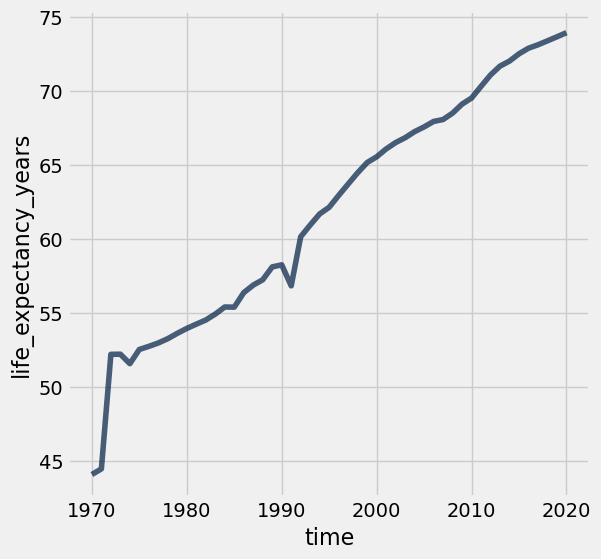

In [13]:
#Fill in code here
life_expectancy_bangladesh_since_1970 = life_expectancy.where('geo', 'bgd').where('time', are.above_or_equal_to(1970))
life_expectancy_bangladesh_since_1970.plot('time', 'life_expectancy_years')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 4.** Assuming everything else stays the same, do the trends in life expectancy in the graph above directly explain why the population growth rate decreased from 1985 to 2015 in Bangladesh? Why or why not? 

Hint: What happened in Bangladesh in 1991, and does that event explain the overall change in population growth rate? This [webpage](https://en.wikipedia.org/wiki/1991_Bangladesh_cyclone) provides relevant context.


The trends in life expectancy in the graph does not directly explain why the populatio growth rate decreased from 1985 to 2015 in Bangladesh. The graph above shows that as the years went by the life expectancy has increased. An increase in life expectancy correlates with better living conditions, which would mean that the population growth rate would not increase. In 1991 there was a cyclone in Bangladesh, which has been estimated to have killed 138,000 people. While this event may have decreased the life expectancy for Bangladesh for a couple of years, it does not explain the change in the population growth rate since it was temporary, as the life expectancy sharply rose from 1991 to 2000 according to the graph.

<!-- END QUESTION -->

The `fertility` table contains a statistic that is often used to measure how many babies are being born, the *total fertility rate*. This number describes the [number of children a woman would have in her lifetime](https://www.measureevaluation.org/prh/rh_indicators/specific/fertility/total-fertility-rate), on average, if the current rates of birth by age of the mother persisted throughout her child bearing years, assuming she survived through age 49. 

**Question 5.** Complete the function `fertility_over_time`. It takes the Alpha-3 code of a country as `country_code` and a `start` year. It returns a two-column table with labels `Year` and `Children per woman` that can be used to generate a line chart of the country's fertility rate each year, starting at the `start` year. The plot should include the `start` year and all later years that appear in the `fertility` table. 

Then, determine the Alpha-3 code for Bangladesh. The code for Bangladesh and the year 1970 are used in the call to your `fertility_over_time` function in order to plot how Bangladesh's fertility rate has changed since 1970. Note that the function `fertility_over_time` should not return the plot itself. **The expression that draws the line plot is provided for you; please don't change it.**


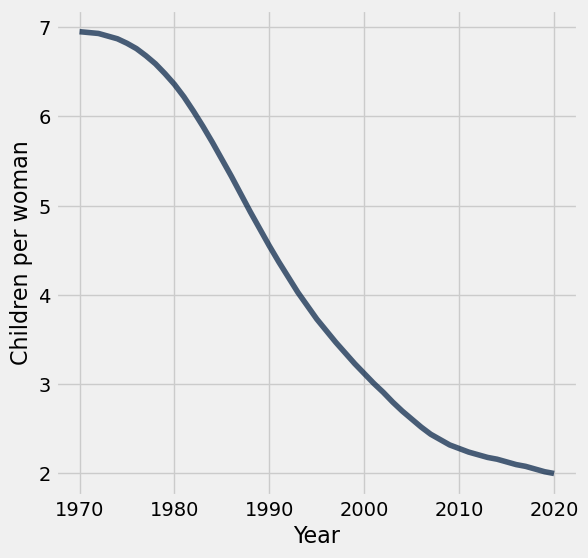

In [14]:
def fertility_over_time(country_code, start):
    """Create a two-column table that describes a country's total fertility rate each year."""
    country_fertility = fertility.where('geo', are.equal_to(country_code))
    country_fertility_after_start = country_fertility.where('time', are.above_or_equal_to(start))
    cleaned_table = country_fertility_after_start.drop('geo').relabeled('time', 'Year').relabeled('children_per_woman_total_fertility', 'Children per woman')
    return cleaned_table

bangladesh_code = 'bgd'
fertility_over_time(bangladesh_code, 1970).plot(0, 1) # You should *not* change this line.

In [15]:
grader.check("q1_5")

q1_5 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 6.** Assuming everything else is constant, do the trends in fertility in the graph above help directly explain why the population growth rate decreased from 1980 to 2020 in Bangladesh? Why or why not?


The trends in fertility in the graph helps directly explain why the population growth rate decreased from 1980 too 2020 in Bangladesh. When the fertility rate decreases, there is a decrease in population growth since each woman has fewer children. The fertility rate is closely related to the population growth rate and if the population growth decreases but stays at replacement level, the growth rate decreases.

<!-- END QUESTION -->

It has been [observed](https://www.ageing.ox.ac.uk/download/143) that lower fertility rates are often associated with lower child mortality rates. The link has been attributed to family planning: if parents can expect that their children will all survive into adulthood, then they will choose to have fewer children. In the reverse direction, having fewer children may allow families to devote more resources to each child, reducing child mortality. We can see if this association is evident in Bangladesh by plotting the relationship between total fertility rate and [child mortality rate per 1000 children](https://en.wikipedia.org/wiki/Child_mortality).

**Question 7.** Using both the `fertility` and `child_mortality` tables, draw a scatter diagram that has Bangladesh's total fertility on the horizontal axis and its child mortality on the vertical axis with one point for each year, starting with 1970.

**The code that draws the scatter diagram is provided for you; please don't change it.** Instead, create a table called `post_1969_fertility_and_child_mortality` with the appropriate column labels and data in order to generate the chart correctly. Use the label `Children per woman` to describe total fertility and the label `Child deaths per 1000 born` to describe child mortality.

*Hint*: Do not drop the `time` column or you will get an error in the scatterplot in the next cell!


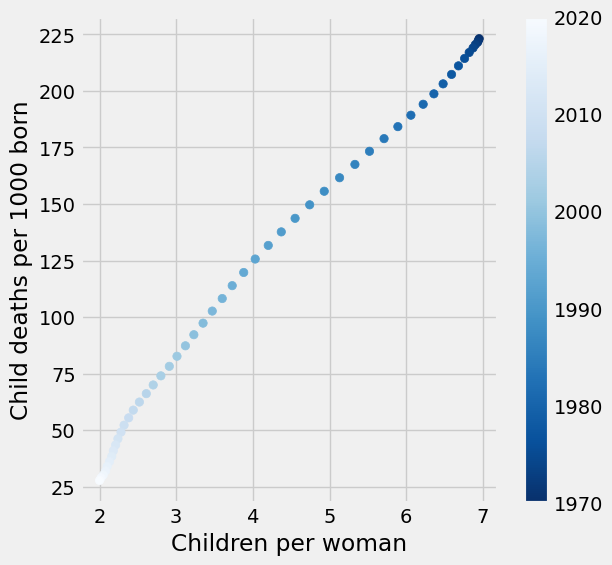

In [16]:
bgd_fertility = fertility.where('geo', are.equal_to('bgd')).drop('geo')
bgd_child_mortality = child_mortality.where('geo', are.equal_to('bgd')).drop('geo')
fertility_and_child_mortality = bgd_fertility.join('time', bgd_child_mortality)
post_1969_fertility_and_child_mortality = fertility_and_child_mortality.where('time', are.above_or_equal_to(1970)).relabeled('children_per_woman_total_fertility', 'Children per woman').relabeled('child_mortality_under_5_per_1000_born', 'Child deaths per 1000 born')

# Don't change anything below this line!
x_births = post_1969_fertility_and_child_mortality.column("Children per woman")
y_deaths = post_1969_fertility_and_child_mortality.column("Child deaths per 1000 born")
time_colors = post_1969_fertility_and_child_mortality.column("time")

plots.figure(figsize=(6,6))
plots.scatter(x_births, y_deaths, c=time_colors, cmap="Blues_r")
plots.colorbar()                  
plots.xlabel("Children per woman")
plots.ylabel("Child deaths per 1000 born");

In [17]:
grader.check("q1_7")

q1_7 results: All test cases passed!

The plot above uses **color** to encode data about the `time` column from the table `post_1969_fertility_and_child_mortality`. The colors, ranging from dark blue to white, represent the passing of time between the 1970s to the 2020s. For example, a point on the scatter plot representing data from the 1970s would appear as **dark blue** and a point from the 2010s would appear as **light blue**.


<!-- BEGIN QUESTION -->

**Question 8.** In one or two sentences, describe the association (if any) that is illustrated by this scatter diagram. Does the diagram show that reduced child mortality *causes* parents to choose to have fewer children?


There is a strong positive association between Children per woman and Child deaths per 1000 born. As the number of children per woman increases, the child deaths per 1000 is higher. The diagram does not show that reduced child mortality cause fewer children but a correlation between childern per woman and child mortality. Other confounding factors such as women's rights, women's education, economic development, and access to family planning could also influence children per woman and child mortality.The diagram alone does that establish a direct link between children per woman and child mortality.

<!-- END QUESTION -->

<img src="yoshi.jpg" alt="drawing" width="500"/>

**WOOOHOO Yoshi and friends want to congratulate you on getting this far!**



--- 

To double check your work, the cell below will rerun all of the autograder tests for Section 1. 

In [18]:
checkpoint_tests = ["q1_1", "q1_2", "q1_5", "q1_7"]
for test in checkpoint_tests:
    display(grader.check(test))

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_5 results: All test cases passed!

q1_7 results: All test cases passed!

## Submission
If your instructor would like you to submit the work in part one as a checkpoint to the project, follow the instructions below.

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [19]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)

### The World

The change observed in Bangladesh since 1970 can also be observed in many other developing countries: health services improve, life expectancy increases, and child mortality decreases. At the same time, the fertility rate often plummets, and so the population growth rate decreases despite increasing longevity.

Run the cell below to generate two overlaid histograms, one for 1962 and one for 2010, that show the distributions of total fertility rates for these two years among all 201 countries in the `fertility` table.

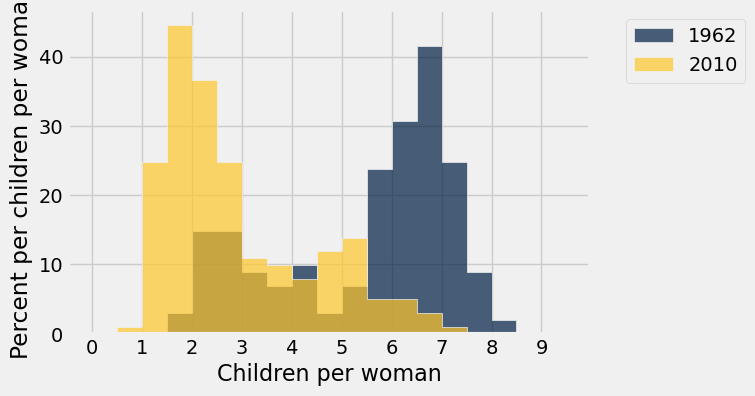

In [20]:
Table().with_columns(
    '1962', fertility.where('time', 1962).column(2),
    '2010', fertility.where('time', 2010).column(2)
).hist(bins=np.arange(0, 10, 0.5), unit='child per woman')
_ = plots.xlabel('Children per woman')
_ = plots.ylabel('Percent per children per woman')
_ = plots.xticks(np.arange(10))

**Question 9.** Assign `fertility_statements` to an array of the numbers of each statement below that can be correctly inferred from these histograms.

1. About the same number of countries had a fertility rate between 3.5 and 4.5 in both 1962 and 2010.
1. In 1962, less than 20% of countries had a fertility rate below 3.
1. At least half of countries had a fertility rate between 5 and 8 in 1962.
1. In 2010, about 40% of countries had a fertility rate between 1.5 and 2.
1. At least half of countries had a fertility rate below 3 in 2010.
1. More countries had a fertility rate above 3 in 1962 than in 2010.


In [21]:
fertility_statements = make_array(1, 2, 3, 4, 6)

In [22]:
grader.check("q1_9")

q1_9 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 10.** Draw a line plot of the world population from 1800 through 2020 (inclusive of both endpoints). The world population is the sum of all of the countries' populations. You should use the `population` table defined earlier in the project. 


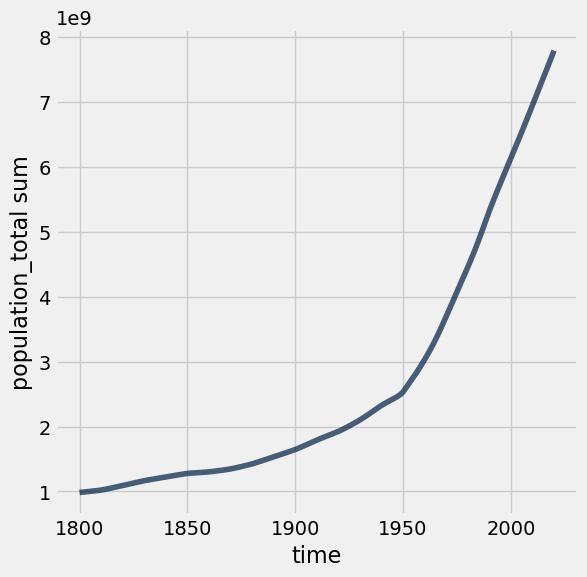

In [23]:
#Fill in code here
timePeriod = population.where('time', are.between_or_equal_to(1800, 2020)) #filtered time period to 1800-2020
worldPopulation = timePeriod.group('time', sum) #grouped by time and aggregated the population_total column, basically summed the population total of each country at a given year
# worldPopulation 
worldPopulation.plot('time', 'population_total sum')

<!-- END QUESTION -->

**Question 11.** Create a function `stats_for_year` that takes a `year` and returns a table of statistics. The table it returns should have four columns: `geo`, `population_total`, `children_per_woman_total_fertility`, and `child_mortality_under_5_per_1000_born`. Each row should contain one unique Alpha-3 country code and three statistics: population, fertility rate, and child mortality for that `year` from the `population`, `fertility` and `child_mortality` tables. Only include rows for which all three statistics are available for the country and year.

In addition, restrict the result to country codes that appears in `big_50`, an array of the 50 most populous countries in 2020. This restriction will speed up computations later in the project.

After you write `stats_for_year`, try calling `stats_for_year` on any year between 1960 and 2020. Try to understand the output of stats_for_year.

*Hint*: The tests for this question are quite comprehensive, so if you pass the tests, your function is probably correct. However, without calling your function yourself and looking at the output, it will be very difficult to understand any problems you have, so try your best to write the function correctly and check that it works before you rely on the `grader` tests to confirm your work.

*Hint*: What do all three tables have in common (pay attention to column names)?


In [24]:
# We first create a population table that only includes the 
# 50 countries with the largest 2020 populations. We focus on 
# these 50 countries only so that plotting later will run faster.
big_50 = population.where('time', are.equal_to(2020)).sort("population_total", descending=True).take(np.arange(50)).column('geo')
population_of_big_50 = population.where('time', are.above(1959)).where('geo', are.contained_in(big_50))

def stats_for_year(year):
    """Return a table of the stats for each country that year."""
    p = population_of_big_50.where('time', are.equal_to(year)).drop('time')
    f = fertility.where('time', are.equal_to(year)).drop('time')
    c = child_mortality.where('time', are.equal_to(year)).drop('time')
    return p.join('geo', f).join('geo',  c)

stats_for_year(2020)

geo,population_total,children_per_woman_total_fertility,child_mortality_under_5_per_1000_born
afg,38928341,4.04,58.08
ago,32866268,5.41,72.29
arg,45195777,2.23,9.4
bgd,164689383,2,27.7
bra,212559409,1.67,13.47
can,37742157,1.56,4.89
chn,1439323774,1.65,8.09
cod,89561404,5.72,84.53
col,50882884,1.78,13.48
deu,83783945,1.49,3.24


In [25]:
grader.check("q1_11")

q1_11 results: All test cases passed!

**Question 12.** Create a table called `pop_by_decade` with two columns called `decade` and `population`, in this order. It has a row for each year that starts a decade, in increasing order starting with 1960 and ending with 2020. For example, 1960 is the start of the 1960's decade. The `population` column contains the total population of all countries included in the result of `stats_for_year(year)` for the first `year` of the decade. You should see that these countries contain most of the world's population.

*Hint:* One approach is to define a function `pop_for_year` that computes this total population, then `apply` it to the `decade` column.  The `stats_for_year` function from the previous question may be useful here.

This first test is just a sanity check for your helper function if you choose to use it. You will not lose points for not implementing the function `pop_for_year`.

**Note:** The cell where you will generate the `pop_by_decade` table is below the cell where you can choose to define the helper function `pop_for_year`. You should define your `pop_by_decade` table in the cell that starts with the table `decades` being defined. 


In [26]:
def pop_for_year(year):
    """Return the total population for the specified year."""
    return sum(stats_for_year(year).column('population_total'))

In [27]:
grader.check("q1_12_0")

q1_12_0 results: All test cases passed!

Now that you've defined your helper function (if you've chosen to do so), define the `pop_by_decade` table.


In [28]:
decades = Table().with_column('decade', np.arange(1960, 2021, 10))
pop_by_decade = decades.with_column('population', decades.apply(pop_for_year))
pop_by_decade.set_format(1, NumberFormatter)

decade,population
1960,"2,635,123,897"
1970,"3,221,457,416"
1980,"3,890,044,418"
1990,"4,656,339,803"
2000,"5,377,062,169"
2010,"6,064,674,132"
2020,"6,765,161,289"


In [29]:
grader.check("q1_12")

q1_12 results: All test cases passed!

The `countries` table describes various characteristics of countries. The `country` column contains the same codes as the `geo` column in each of the other data tables (`population`, `fertility`, and `child_mortality`). The `world_6region` column classifies each country into a region of the world. Run the cell below to inspect the data.

In [30]:
countries = Table.read_table('countries.csv').where('country', are.contained_in(population.group('geo').column('geo')))
countries.select('country', 'name', 'world_6region')

country,name,world_6region
afg,Afghanistan,south_asia
ago,Angola,sub_saharan_africa
alb,Albania,europe_central_asia
and,Andorra,europe_central_asia
are,United Arab Emirates,middle_east_north_africa
arg,Argentina,america
arm,Armenia,europe_central_asia
atg,Antigua and Barbuda,america
aus,Australia,east_asia_pacific
aut,Austria,europe_central_asia


**Question 13.** Create a table called `region_counts`. It should contain two columns called `region` and `count`. The `region` column should contain regions of the world, and the `count` column should contain the number of countries in each region that appears in the result of `stats_for_year(2020)`. 

For example, one row would have `south_asia` as its `region` value and an integer as its `count` value: the number of large South Asian countries for which we have population, fertility, and child mortality numbers from 2020.

*Hint*: You may have to relabel a column to name it `region`. 


In [31]:
stats_for_2020 = stats_for_year(2020)
region_counts = countries.select('country', 'name', 'world_6region').join('country', stats_for_2020, 'geo').group(
    'world_6region').relabeled('world_6region', 'region')
region_counts

region,count
america,8
east_asia_pacific,9
europe_central_asia,10
middle_east_north_africa,7
south_asia,5
sub_saharan_africa,11


In [32]:
grader.check("q1_13")

q1_13 results: All test cases passed!

The following scatter diagram compares total fertility rate and child mortality rate for each country in 1960. The area of each dot represents the population of the country, and the color represents its region of the world. Run the cell. Do you think you can identify any of the dots?

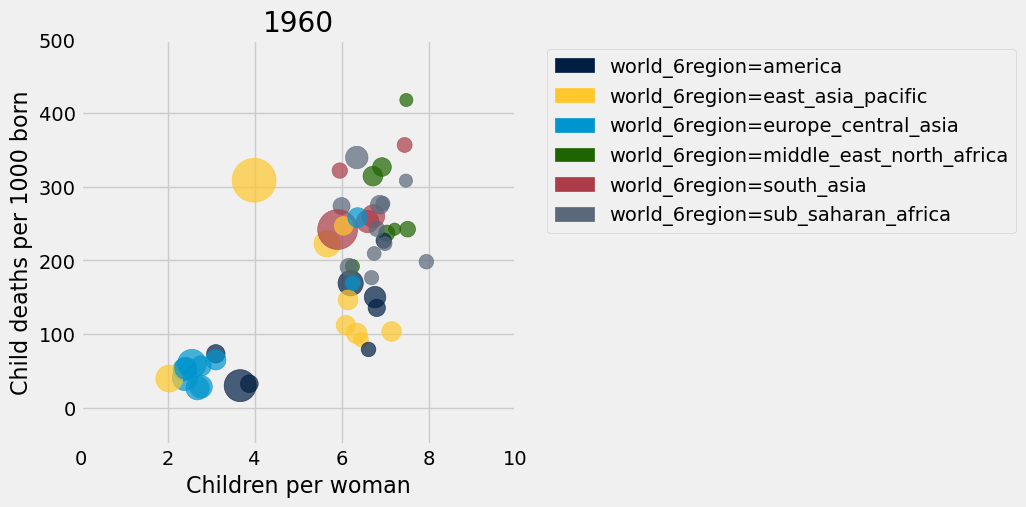

In [33]:
from functools import lru_cache as cache

# This cache annotation makes sure that if the same year
# is passed as an argument twice, the work of computing
# the result is only carried out once.
@cache(None)
def stats_relabeled(year):
    """Relabeled and cached version of stats_for_year."""
    return stats_for_year(year).relabel(2, 'Children per woman').relabel(3, 'Child deaths per 1000 born')

def fertility_vs_child_mortality(year):
    """Draw a color scatter diagram comparing child mortality and fertility."""
    with_region = stats_relabeled(year).join('geo', countries.select('country', 'world_6region'), 'country')
    with_region.scatter(2, 3, sizes=1, group=4, s=500)
    plots.xlim(0,10)
    plots.ylim(-50, 500)
    plots.title(year)
    plots.show()

fertility_vs_child_mortality(1960)

**Question 14.** Assign `scatter_statements` to an array of the numbers of each statement below that can be inferred from this scatter diagram for 1960. 
1. As a whole, the `europe_central_asia` region had the lowest child mortality rate.
1. The lowest child mortality rate of any country was from an `east_asia_pacific` country.
1. Most countries had a fertility rate above 5.
1. There was an association between child mortality and fertility.
1. The two largest countries by population also had the two highest child mortality rates.


In [34]:
scatter_statements = make_array(1,4)

In [35]:
grader.check("q1_14")

q1_14 results: All test cases passed!

The result of the cell below is interactive. Drag the slider to the right to see how countries have changed over time. You'll find that the great divide between so-called "Western" and "developing" countries that existed in the 1960's has nearly disappeared. This shift in fertility rates is the reason that the global population is expected to grow more slowly in the 21st century than it did in the 19th and 20th centuries.

**Note:** Don't worry if a red warning pops up when running the cell below. You'll still be able to run the cell!

In [36]:
import ipywidgets as widgets

_ = widgets.interact(fertility_vs_child_mortality, 
                     year=widgets.IntSlider(min=1960, max=2020, value=1960))

interactive(children=(IntSlider(value=1960, description='year', max=2020, min=1960), Output()), _dom_classes=(…

Now is a great time to take a break and watch the same data presented by [Hans Rosling in a 2010 TEDx talk](https://www.gapminder.org/videos/reducing-child-mortality-a-moral-and-environmental-imperative) with smoother animation and witty commentary.

## 2. Global Poverty

In [37]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import d8error

In 1800, 85% of the world's 1 billion people lived in [extreme poverty](https://en.wikipedia.org/wiki/Extreme_poverty), defined by the United Nations as "a condition characterized by severe deprivation of basic human needs, including food, safe drinking water, sanitation facilities, health, shelter, education and information." At the time when the data in this project were gathered, a common definition of extreme poverty was a person living on less than \$1.25 a day.

In 2018, the proportion of people living in extreme poverty was estimated to be [about 9\%](https://unstats.un.org/sdgs/report/2019/goal-01/). Although the world rate of extreme poverty has declined consistently for hundreds of years, the number of people living in extreme poverty is still over 600 million. The United Nations adopted an [ambitious goal](http://www.un.org/sustainabledevelopment/poverty/): "By 2030, eradicate extreme poverty for all people everywhere." In this part of the project we will examine aspects of global poverty that might affect whether the goal is achievable.

First, load the population and poverty rate by country and year and the country descriptions. While the `population` table has values for every recent year for many countries, the `poverty` table only includes certain years for each country in which a measurement of the rate of extreme poverty was available.

In [38]:
population = Table.read_table('population.csv')
countries = Table.read_table('countries.csv').where('country', are.contained_in(population.group('geo').column('geo')))
poverty = Table.read_table('poverty.csv')
poverty.show(3)

geo,time,extreme_poverty_percent_people_below_125_a_day
alb,1996,0.2
alb,2002,0.73
alb,2004,0.53


**Question 1.** Assign `latest_poverty` to a three-column table with one row for each country that appears in the `poverty` table. The first column should contain the 3-letter code for the country. The second column should contain the most recent year for which an extreme poverty rate is available for the country. The third column should contain the poverty rate in that year. **Do not change the last line, so that the labels of your table are set correctly.**

*Hint*: think about how ```group``` works: it does a sequential search of the table (from top to bottom) and collects values in the array in the order in which they appear, and then applies a function to that array. The `first` function may be helpful, but you are not required to use it.


In [39]:
def first(values):
    return values.item(0)

latest_poverty = poverty.sort('time', descending = True).group('geo', first)
latest_poverty = latest_poverty.relabeled(0, 'geo').relabeled(1, 'time').relabeled(2, 'poverty_percent') # You should *not* change this line.
latest_poverty

geo,time,poverty_percent
ago,2009,43.37
alb,2012,0.46
arg,2011,1.41
arm,2012,1.75
aus,2003,1.36
aut,2004,0.34
aze,2008,0.31
bdi,2006,81.32
bel,2000,0.5
ben,2012,51.61


In [40]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.** Using both `latest_poverty` and `population`, create a four-column table called `recent_poverty_total` with one row for each country in `latest_poverty`. The four columns should have the following labels and contents:
1. `geo` contains the 3-letter country code,
1. `poverty_percent` contains the most recent poverty percent,
1. `population_total` contains the population of the country in 2010,
1. `poverty_total` contains the number of people in poverty **rounded to the nearest integer**, based on the 2010 population and most recent poverty rate.

*Hint*: You are not required to use `poverty_and_pop`, and you are always welcome to add any additional names. 

In [41]:
poverty_and_pop = latest_poverty.join('geo', population.where('time', 2010)).drop('time').drop('time_2')
recent_poverty_total = poverty_and_pop.with_column('poverty_total',
np.round(poverty_and_pop.column('poverty_percent')/100 * poverty_and_pop.column('population_total'))                                                  
)
recent_poverty_total

geo,poverty_percent,population_total,poverty_total
ago,43.37,23356247,1.01296e+07
alb,0.46,2948029,13561
arg,1.41,40895751,576630
arm,1.75,2877314,50353
aus,1.36,22154687,301304
aut,0.34,8409945,28594
aze,0.31,9032465,28001
bdi,81.32,8675606,7.055e+06
bel,0.5,10938735,54694
ben,51.61,9199254,4.74774e+06


In [42]:
grader.check("q2_2")

q2_2 results: All test cases passed!

**Question 3.** Assign the name `poverty_percent` to the known percentage of the world’s 2010 population that were living in extreme poverty. Assume that the `poverty_total` numbers in the `recent_poverty_total` table describe **all** people in 2010 living in extreme poverty. You should get a number that is above the 2018 global estimate of 9%, since many country-specific poverty rates are older than 2018.

*Hint*: The sum of the `population_total` column in the `recent_poverty_total` table is not the world population, because only a subset of the world's countries are included in the `recent_poverty_total` table (only some countries have known poverty rates). Use the `population` table to compute the world's 2010 total population.

*Hint*: We are computing a percentage (value between 0 and 100), not a proportion (value between 0 and 1).


In [43]:
poverty_percent = sum(recent_poverty_total.column('poverty_total')) /sum(population.where('time', 2010).column(
    'population_total')) * 100 
poverty_percent


14.248865303997139

In [44]:
grader.check("q2_3")

q2_3 results: All test cases passed!

The `countries` table includes not only the name and region of countries, but also their positions on the globe.

In [45]:
countries.select('country', 'name', 'world_4region', 'latitude', 'longitude')

country,name,world_4region,latitude,longitude
afg,Afghanistan,asia,33,66
ago,Angola,africa,-12.5,18.5
alb,Albania,europe,41,20
and,Andorra,europe,42.5078,1.52109
are,United Arab Emirates,asia,23.75,54.5
arg,Argentina,americas,-34,-64
arm,Armenia,europe,40.25,45
atg,Antigua and Barbuda,americas,17.05,-61.8
aus,Australia,asia,-25,135
aut,Austria,europe,47.3333,13.3333


**Question 4.** Using both `countries` and `recent_poverty_total`, create a five-column table called `poverty_map` with one row for every country in `recent_poverty_total`.  The five columns should have the following labels and contents:
1. `latitude` contains the country's latitude,
1. `longitude` contains the country's longitude,
1. `name` contains the country's name,
1. `region` contains the country's region from the `world_4region` column of `countries`,
1. `poverty_total` contains the country's poverty total.


In [46]:
positions = countries.select('country', 'name', 'world_4region', 'latitude', 'longitude').relabeled('world_4region', 'region')
poverty_map = recent_poverty_total.join('geo', positions, 'country')
poverty_map = poverty_map.select('latitude', 'longitude', 'name', 'region', 'poverty_total')
poverty_map

latitude,longitude,name,region,poverty_total
-12.5,18.5,Angola,africa,1.01296e+07
41,20,Albania,europe,13561
-34,-64,Argentina,americas,576630
40.25,45,Armenia,europe,50353
-25,135,Australia,asia,301304
47.3333,13.3333,Austria,europe,28594
40.5,47.5,Azerbaijan,europe,28001
-3.5,30,Burundi,africa,7.055e+06
50.75,4.5,Belgium,europe,54694
9.5,2.25,Benin,africa,4.74774e+06


In [47]:
grader.check("q2_4")

q2_4 results: All test cases passed!

Run the cell below to draw a map of the world in which the areas of circles represent the number of people living in extreme poverty. Double-click on the map to zoom in.

In [48]:
# It may take a few seconds to generate this map.
colors = {'africa': 'blue', 'europe': 'black', 'asia': 'red', 'americas': 'green'}
scaled = poverty_map.with_columns(
    'labels', poverty_map.column('name'),
    'colors', poverty_map.apply(colors.get, 'region'),
    'areas', 1e-4 * poverty_map.column('poverty_total')
).drop('name', 'region', 'poverty_total')

Circle.map_table(scaled)

Although people lived in extreme poverty throughout the world in 2010 (with more than 5 million in the United States), the largest numbers were in Asia and Africa.

**Question 5.** Assign `largest` to a two-column table with the `name` (not the 3-letter code) and `poverty_total` of the 10 countries with the largest number of people living in extreme poverty.

*Hint*: How can we use `take` and `np.arange` in conjunction with each other?


In [49]:
largest = poverty_map.sort('poverty_total', descending = True).select('name', 'poverty_total')
largest = largest.take(np.arange(10))
largest.set_format('poverty_total', NumberFormatter)

name,poverty_total
India,"291,660,639.00"
Nigeria,"98,319,537.00"
China,"85,687,544.00"
Bangladesh,"63,826,375.00"
"Congo, Dem. Rep.","56,635,412.00"
Indonesia,"39,177,145.00"
Ethiopia,"32,242,742.00"
Pakistan,"22,858,700.00"
Tanzania,"19,281,872.00"
Madagascar,"18,543,643.00"


In [50]:
grader.check("q2_5")

q2_5 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 6.** It is important to study the absolute number of people living in poverty, not just the percent. The absolute number is an important factor in determining the amount of resources needed to support people living in poverty. In the next two questions you will explore this.

In Question 7, you will be asked to write a function called `poverty_timeline` that takes **the name of a country** as its argument  (not the Alpha-3 country code). It should draw a line plot of the number of people living in poverty in that country with time on the horizontal axis. The line plot should have a point for each row in the `poverty` table for that country. To compute the population living in poverty from a poverty percentage, multiply by the population of the country **in that year**.

For this question, write out a generalized process for Question 7. What should this function output, and what steps will you take within the function?


1. The function takes in the name of the country
2. Use the countries table to get the Alpha-3 country code for the name of the country
3. Filter the poverty and population table to only include rows for the country inputted
4. Join the poverty and population table by using the geo code and year, remove years where the poverty rate is unreported
5. Multiply the poverty percentage by the population of the country in that year
6. Create a line plot using the time column as the x-axis and the poverty_total for the y-axis
7. The function should not return any value and instead plot the line plot

<!-- END QUESTION -->

**Question 7.** Now, we'll actually write the function called `poverty_timeline`. Recall that `poverty_timeline` takes **the name of a country** as its argument (not the Alpha-3 country code). It should draw a line plot of the number of people living in poverty in that country with time on the horizontal axis. The line plot should have a point for each row in the `poverty` table for that country. To compute the population living in poverty from a poverty percentage, multiply by the population of the country **in that year**.

*Hint:* This question is long. Feel free to create cells and experiment. You can create cells by going to the toolbar and hitting the `+` button, or by going to the `Insert` tab.

_Type your answer here, replacing this text._

In [82]:
#     geo = countries.where('name', are.equal_to('Bangladesh')).column('country').item(0)
#     filtered_poverty = poverty.where('geo', are.equal_to(geo))
#     #     filtered_poverty
#     filterd_population = population.where('geo', are.equal_to(geo))
#     filterd_population
#     poverty_and_population = filtered_poverty.join('time', filterd_population, 'time').relabeled(
#         'extreme_poverty_percent_people_below_125_a_day', 'poverty_percent').where('poverty_percent', are.above(0)).drop(
#         'geo_2')
#     poverty_total = poverty_and_population.column('poverty_percent') / 100 * poverty_and_population.column('population_total')
#     poverty_and_population = poverty_and_population.with_column('poverty_total', poverty_total)
#     poverty_and_population.plot('time', 'poverty_total')
    
def poverty_timeline(country):
    '''Draw a timeline of people living in extreme poverty in a country.'''
    geo = countries.where('name', are.equal_to(country)).column('country').item(0)
    # This solution will take multiple lines of code. Use as many as you need
    filtered_poverty = poverty.where('geo', are.equal_to(geo))
    filterd_population = population.where('geo', are.equal_to(geo))
    poverty_and_population = filtered_poverty.join('time', filterd_population, 'time').relabeled(
        'extreme_poverty_percent_people_below_125_a_day', 'poverty_percent').where('poverty_percent', are.above(0)).drop(
        'geo_2')
    poverty_total = poverty_and_population.column('poverty_percent') / 100 * poverty_and_population.column('population_total')
    poverty_and_population = poverty_and_population.with_column('poverty_total', poverty_total)
    poverty_and_population.plot('time', 'poverty_total')
    # Don't change anything below this line. 
    plots.title(country)
    plots.ylim(bottom=0)
    plots.show() # This should be the last line of your function. 

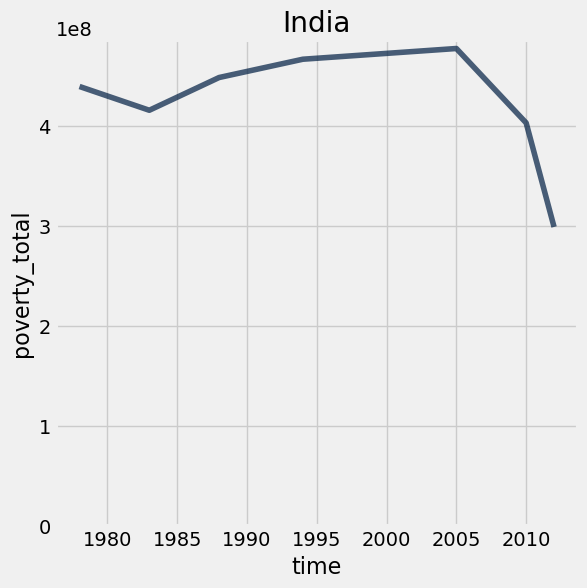

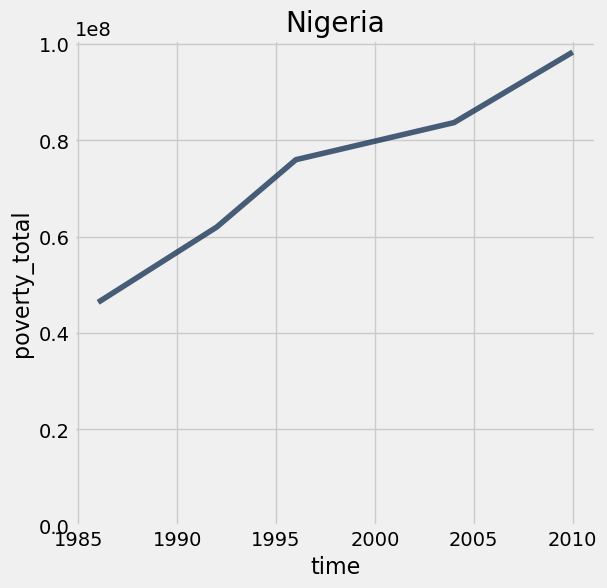

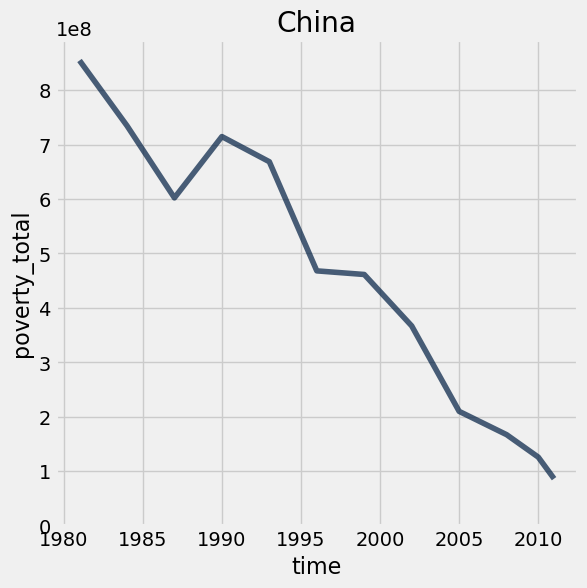

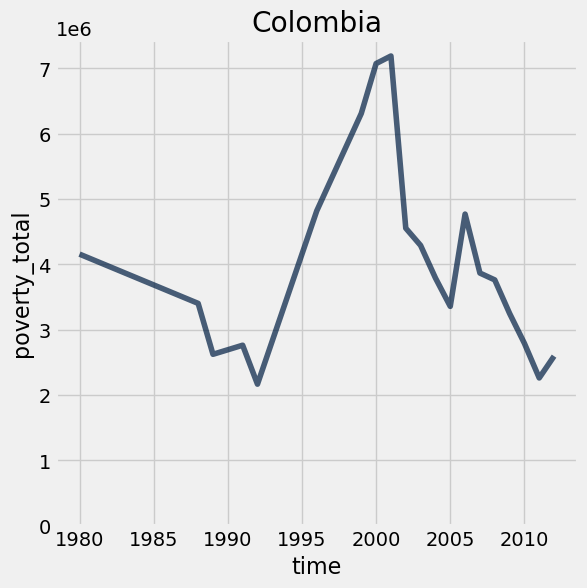

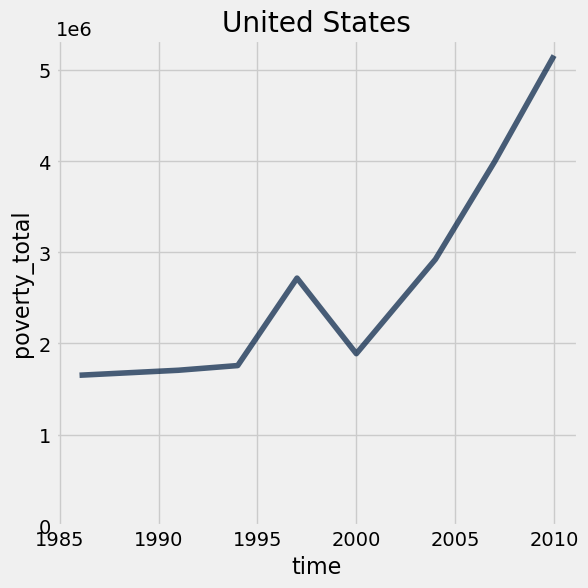

In [83]:
poverty_timeline('India')
poverty_timeline('Nigeria')
poverty_timeline('China')
poverty_timeline('Colombia')
poverty_timeline('United States')

Although the number of people living in extreme poverty increased in some countries including Nigeria and the United States, the decreases in other countries, most notably the massive decreases in China and India, have shaped the overall trend that extreme poverty is decreasing worldwide, both in percentage and in absolute number. 

To learn more, watch [Hans Rosling in a 2015 film](https://www.gapminder.org/videos/dont-panic-end-poverty/) about the UN goal of eradicating extreme poverty from the world. 

Below, we've also added an interactive dropdown menu for you to visualize `poverty_timeline` graphs for other countries. Note that each dropdown menu selection may take a few seconds to run.

In [86]:
# Just run this cell

all_countries = poverty_map.column('name')
_ = widgets.interact(poverty_timeline, country=list(all_countries))

interactive(children=(Dropdown(description='country', options=('Angola', 'Albania', 'Argentina', 'Armenia', 'A…



<img src="mochi.jpg" alt="drawing" width="300"/>

**Mochi wants to tell you, you're finished!** Congratulations on discovering many important facts about global poverty and demonstrating your mastery of table manipulation and data visualization. Time to submit.

**Important submission steps:** 
1. Run the tests and verify that they all pass.
2. Choose **Save Notebook** from the **File** menu, then **run the final cell**. 
3. Click the link to download the zip file.
4. Then submit the zip file to the corresponding assignment according to your instructor's directions. 

**It is your responsibility to make sure your work is saved before running the last cell.**

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [87]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...



Your submission received the following results when run against available test cases:

    q1_1 results: All test cases passed!

    q1_2 results: All test cases passed!

    q1_5 results: All test cases passed!

    q1_7 results: All test cases passed!

    q1_9 results: All test cases passed!

    q1_11 results: All test cases passed!

    q1_12_0 results: All test cases passed!

    q1_12 results: All test cases passed!

    q1_13 results: All test cases passed!

    q1_14 results: All test cases passed!

    q2_1 results: All test cases passed!

    q2_2 results: All test cases passed!

    q2_3 results: All test cases passed!

    q2_4 results: All test cases passed!

    q2_5 results: All test cases passed!
